In [ ]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('with_agent_action.csv',index_col=0)
print(df.shape)
df.columns

(15001, 28)


Index(['user_id', 'age', 'current_browsing_time', 'pages_visited', 'discount',
       'suggested_amount_after_discount', 'onboarding_time',
       'referral_source_Facebook', 'referral_source_Google',
       'referral_source_Instagram', 'referral_source_Telegram',
       'referral_source_Tiktok', 'referral_source_URL',
       'payment_method_Credit Card', 'payment_method_Cryptocurrency',
       'payment_method_PayPal', 'time_of_day_Afternoon', 'time_of_day_Evening',
       'time_of_day_Morning', 'time_of_day_Night', 'device_Android',
       'device_MacOS', 'device_Others', 'device_Windows', 'device_iOS',
       'agent_action', 'agent_discount', 'approved_payment'],
      dtype='object')

In [4]:
df[['approved_payment','agent_discount']].value_counts(normalize=True)

approved_payment  agent_discount
0                 5                 0.240984
1                 5                 0.234184
                  10                0.162323
                  15                0.153323
0                 10                0.105393
                  15                0.103793
dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder

# Assuming X is your DataFrame and 'agent_discount' is a column in it

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'agent_discount' column
df['agent_discount_encoded'] = label_encoder.fit_transform(df['agent_discount'])

df[['agent_discount', 'agent_discount_encoded']].value_counts()

agent_discount  agent_discount_encoded
5               0                         7128
10              1                         4016
15              2                         3857
dtype: int64

In [11]:

# Split the dataset into features (X) and labels (y)
X = df[[#'user_id',
        'age',
        'current_browsing_time',
        'pages_visited',
        #'discount',
        #'suggested_amount_after_discount', 
        'onboarding_time',
        'referral_source_Facebook',
        'referral_source_Google',
        'referral_source_Instagram',
        'referral_source_Telegram',
        'referral_source_Tiktok',
        'referral_source_URL',
        'payment_method_Credit Card',
        'payment_method_Cryptocurrency',
        'payment_method_PayPal', 
        'time_of_day_Afternoon', 
        'time_of_day_Evening',
        'time_of_day_Morning', 
        'time_of_day_Night',
        'device_Android',
        'device_MacOS', 
        'device_Others', 
        'device_Windows',
#         'device_iOS',
        #'agent_action', 
#         'agent_discount',
        'agent_discount_encoded'
        #'approved_payment'
]]
y = df['approved_payment']

In [59]:
df['approved_payment'].fillna(value=1,inplace=True)

In [12]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(X_train.columns)

X_train shape: (10500, 22)
X_test shape: (4501, 22)
y_train shape: (10500,)
y_test shape: (4501,)
Index(['age', 'current_browsing_time', 'pages_visited', 'onboarding_time',
       'referral_source_Facebook', 'referral_source_Google',
       'referral_source_Instagram', 'referral_source_Telegram',
       'referral_source_Tiktok', 'referral_source_URL',
       'payment_method_Credit Card', 'payment_method_Cryptocurrency',
       'payment_method_PayPal', 'time_of_day_Afternoon', 'time_of_day_Evening',
       'time_of_day_Morning', 'time_of_day_Night', 'device_Android',
       'device_MacOS', 'device_Others', 'device_Windows',
       'agent_discount_encoded'],
      dtype='object')


In [13]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=5000, 
                                    learning_rate=0.05, 
                                    depth=16, 
                                    loss_function='Logloss',
                                    l2_leaf_reg=1.0,
                                    border_count=254,
                                    bagging_temperature=2,
                                    random_strength=1.0,
                                    verbose=100)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

0:	learn: 0.6779937	total: 1.28s	remaining: 1h 46m 42s
100:	learn: 0.1554827	total: 1m 37s	remaining: 1h 18m 31s
200:	learn: 0.0677029	total: 3m 15s	remaining: 1h 17m 47s
300:	learn: 0.0387940	total: 4m 58s	remaining: 1h 17m 46s
400:	learn: 0.0259010	total: 6m 42s	remaining: 1h 16m 58s
500:	learn: 0.0186191	total: 8m 24s	remaining: 1h 15m 29s
600:	learn: 0.0143833	total: 10m 5s	remaining: 1h 13m 51s
700:	learn: 0.0115644	total: 11m 48s	remaining: 1h 12m 24s
800:	learn: 0.0095508	total: 13m 29s	remaining: 1h 10m 43s
900:	learn: 0.0080638	total: 15m 11s	remaining: 1h 9m 5s
1000:	learn: 0.0070010	total: 16m 51s	remaining: 1h 7m 22s
1100:	learn: 0.0061868	total: 18m 31s	remaining: 1h 5m 35s
1200:	learn: 0.0055175	total: 20m 8s	remaining: 1h 3m 43s
1300:	learn: 0.0050423	total: 21m 39s	remaining: 1h 1m 34s
1400:	learn: 0.0047157	total: 23m	remaining: 59m 6s
1500:	learn: 0.0044631	total: 24m 15s	remaining: 56m 34s
1600:	learn: 0.0043191	total: 25m 20s	remaining: 53m 47s
1700:	learn: 0.004186

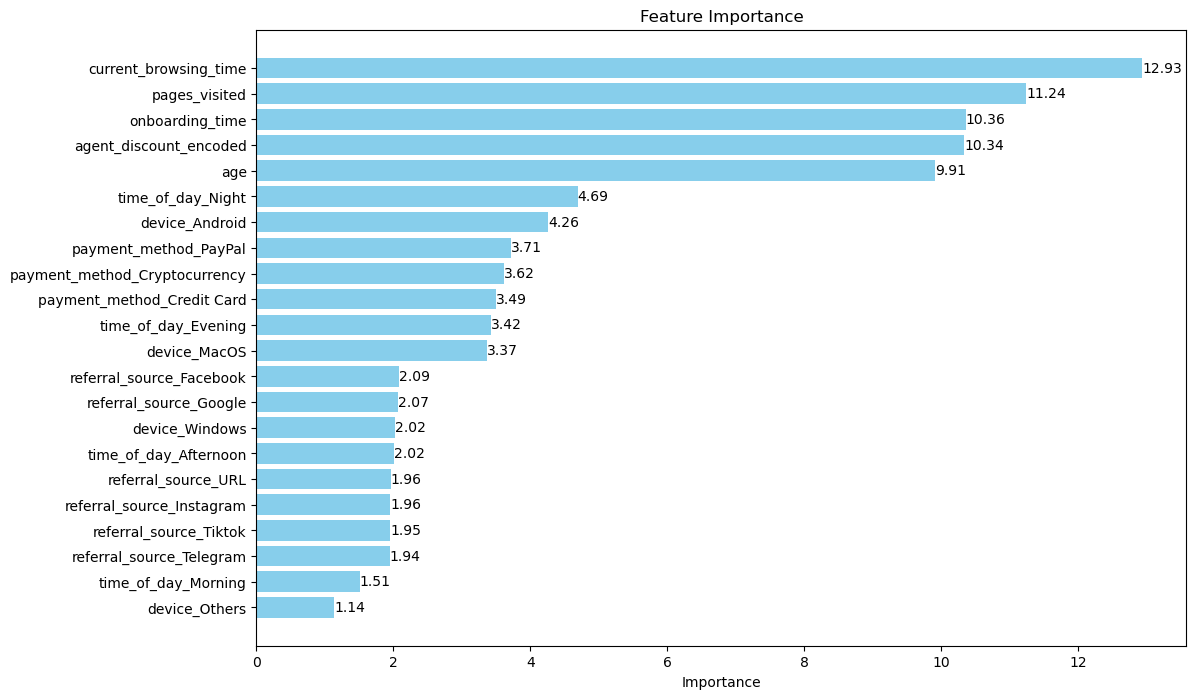

In [14]:
# Get feature importance
feature_importances = catboost_model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
# Annotate bars with the numerical values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}',  # Formatting to 2 decimal places
             va='center', ha='left')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()
